# Introduction




As before, the theme of my project is again about the universities. This time, the correlation between tuition cost at the university and average salary of its graduates was of interest.

### About the dataset
For these purposes, public dataset from kaggle https://www.kaggle.com/jessemostipak/college-tuition-diversity-and-pay was used.

Since the scope of this project covers only simple linear regression, only 2 columns - "mid_career_pay" and "out_of_state_tuition" were used.

Columns were renamed for convinience purposes. 
Overall the LR fit was done on 728 samples.

### Research Question
The research question that this project aims to answer is _"Can tuition cost of university and average salary of its graduates be linearly fit using SLR?"_

To answer this question fundamental assumptions behind SLR will be checked. In case of some violations remedial measures will be applied. Finally, the answer will be summed up from these steps.



# Analysis

Installing and importing required libraries

In [1]:
install.packages("latex2exp")
library(latex2exp)

install.packages("lawstat")
library(lawstat)

install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:lawstat’:

    levene.test




This is what dataset looks like, the first column with university names was dropped.

In [2]:
data <- read.csv("data.csv")
head(data)

,name,Tuition,Salary
,<chr>,<int>,<int>
1,Adams State University,20456,81400
2,Adventist University of Health Sciences,15150,89800
3,Agnes Scott College,41160,83600
4,Alabama State University,19396,71500
5,Alaska Pacific University,20830,90000
6,Albany College of Pharmacy and Health Sciences,35105,144800


In [3]:
data$name <- NULL
head(data)

,Tuition,Salary
,<int>,<int>
1,20456,81400
2,15150,89800
3,41160,83600
4,19396,71500
5,20830,90000
6,35105,144800


## Diagnostics for Predictor Variable
Before fitting it is crucial to see if our potential predictor variable is indeed suitable for further analysis:

In [5]:
attach(data)


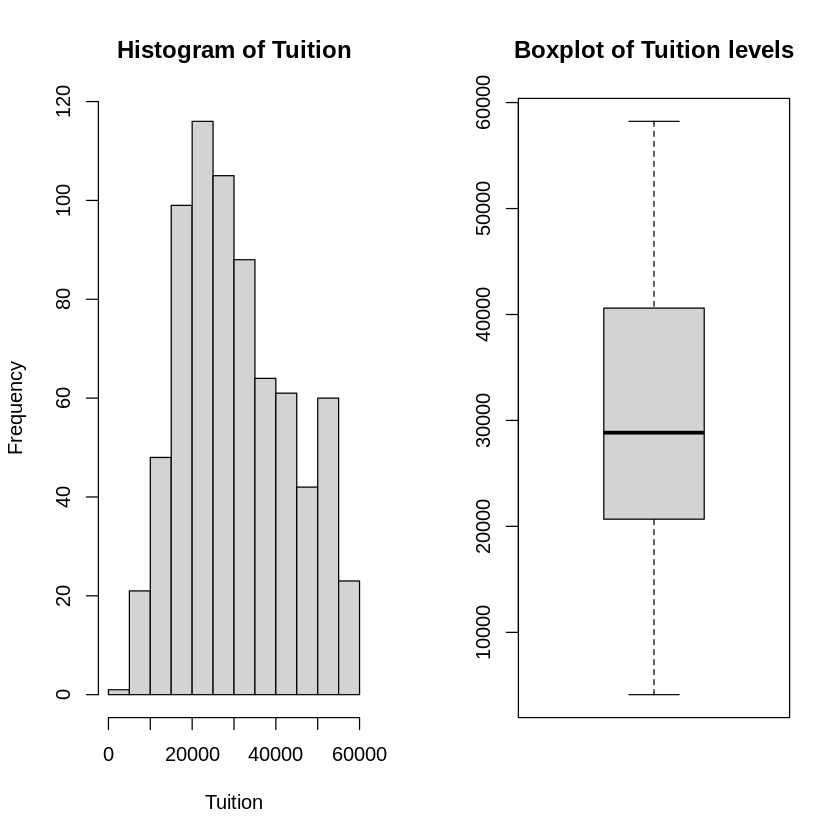

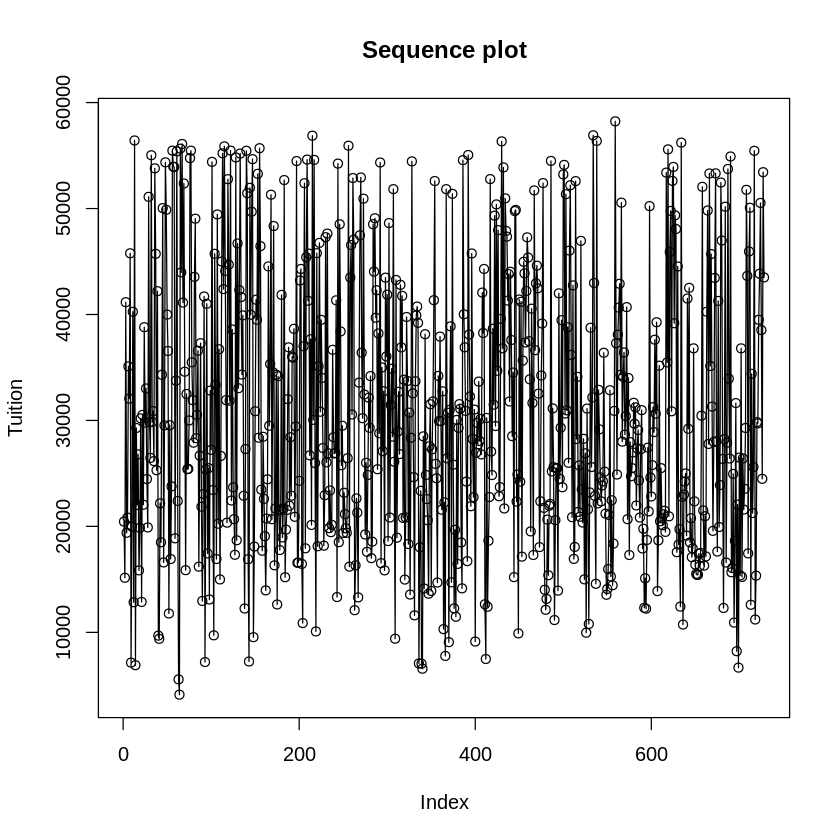

In [6]:

par(mfrow=c(1,2))

hist(Tuition)
boxplot(Tuition, main='Boxplot of Tuition levels')

par(mfrow=c(1,1))

plot(Tuition, main="Sequence plot")
lines(Tuition)

As we can see, it looks like there is no obvious outliers and no dependance between $x_i$ and i. So, tuition rates is OK as predictor variable and we can fit our model

## Simple Linear Regression Model fitting:

In [7]:
model <- lm(Salary ~ Tuition, data=data)
re = model$residuals

In [8]:
summary(model)


Call:
lm(formula = Salary ~ Tuition, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-30893  -8378  -1786   6287  58287 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.846e+04  1.163e+03   58.85   <2e-16 ***
Tuition     7.723e-01  3.496e-02   22.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12200 on 726 degrees of freedom
Multiple R-squared:  0.402,	Adjusted R-squared:  0.4011 
F-statistic:   488 on 1 and 726 DF,  p-value: < 2.2e-16


Right from here we can see that equation of regression function is:
$\hat{Y} = 6.846*10^4 + 0.7723x$

Indeed, there seem to be positive correlation between predictor and response variables.

Moreover, we FTR the hypotheses that either of $b_0$ or $b_1$ are zero.

However, R^2 = 0.402 which shows that data is not perfectly linear.

Let's try to visualize our data points and obtained regression fit line.

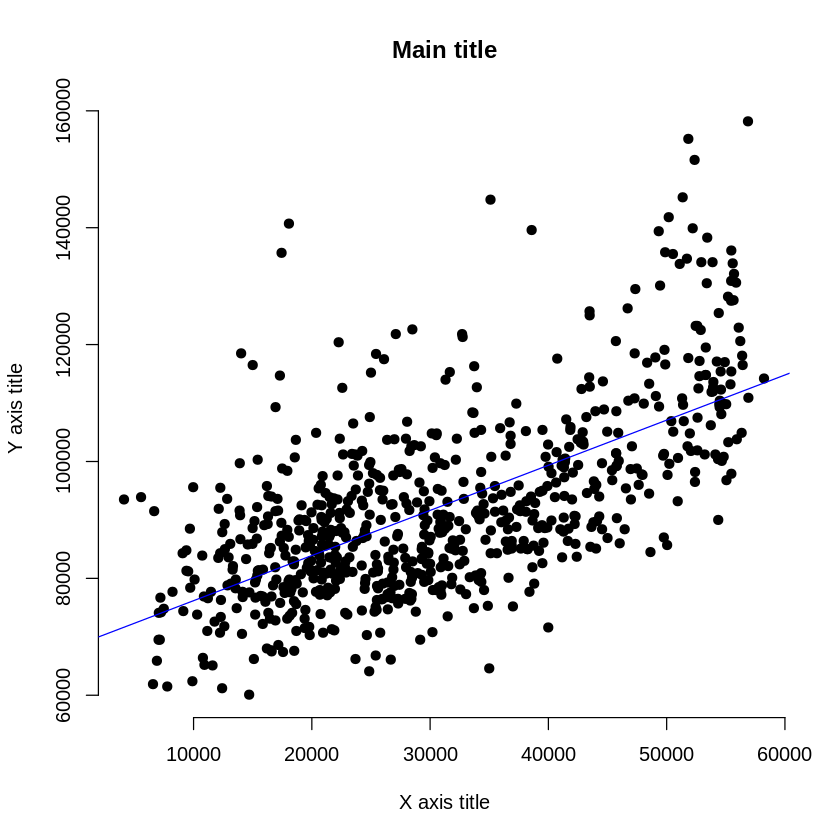

In [9]:
x <- data$Tuition
y <- data$Salary
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.

# Add regression line
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
abline(lm(y ~ x, data = data), col = "blue")

From plot: there is some potential linear correlation between variables. 


## Checking Assumptions

To proceed and answer our research question, we need to check assumptions of SLR.

### Normality


Does the assumption of normally distributed errors work here?

Graphical Method:

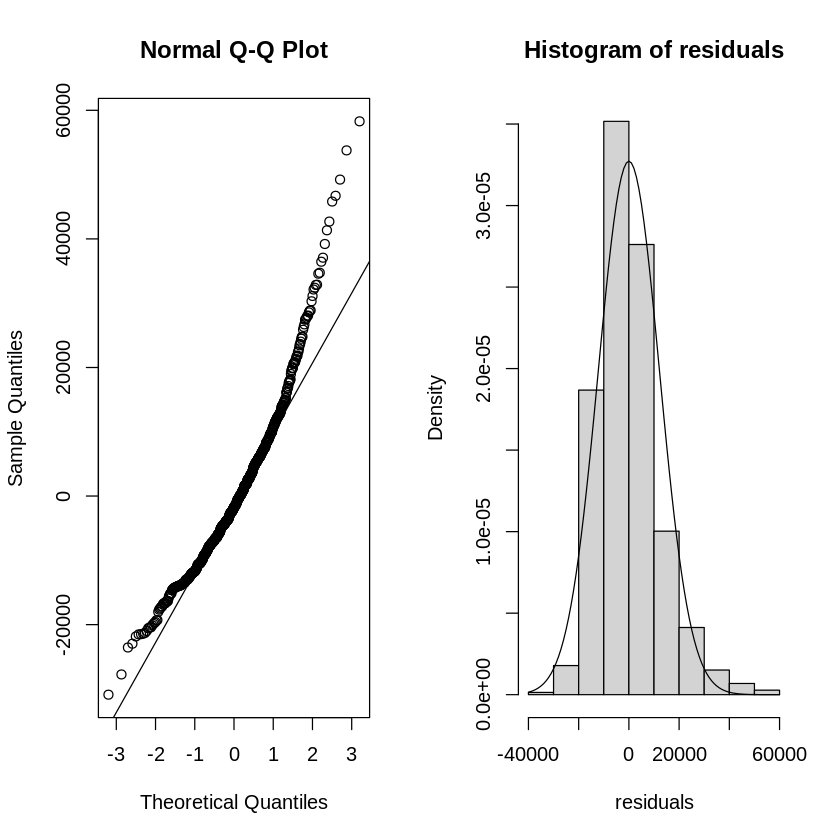

In [10]:
## Q-Q plot
par(mfrow=c(1,2))
qqnorm(re)
qqline(re)
hist(re, xlab='residuals', main='Histogram of residuals', freq=FALSE)
curve(dnorm(x, mean(re), sd(re)), add=TRUE)

Significance Test:

In [11]:
shapiro.test(re)


	Shapiro-Wilk normality test

data:  re
W = 0.94603, p-value = 1.236e-15


Eventhough from graphs (especially histogram) it is hard to conclude whether residuals follow normal distribution or not. Shapiro test concluded that we fail to reject such hypothesis of normal dist.

### Homogeneity of Variance/ Linearity

Graphical Methods:

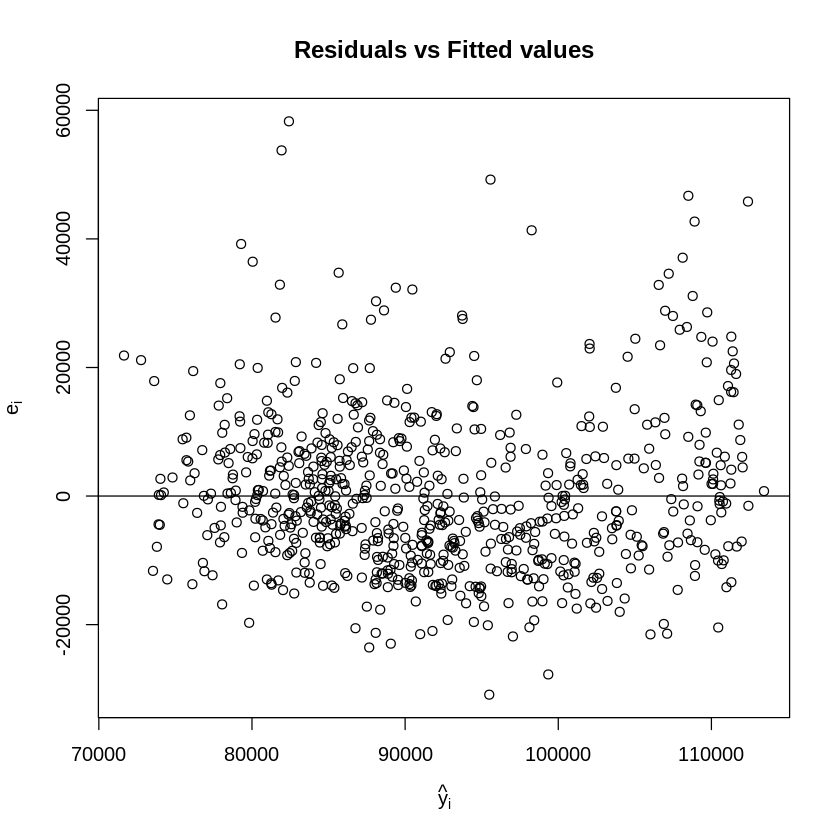

In [12]:
par(mfrow=c(1,1))
fits = model$fitted.values
plot(re ~ fits, main="Residuals vs Fitted values", xlab=TeX("\\hat{y}_i"), ylab=TeX("e_i"))
abline(h=0)

In [13]:
breaks = c(0, 17700, 27000, 32000,  50000, 60000)
groups = cut(data$Tuition, breaks)
leveneTest(re, groups)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,3.10447,0.01506245
,723,NA,NA


The graph of residuals VS fitted_y shows that majority of residuals are in the range from [-20000, 20000]. And according to Levene Test we Reject the hypothesis of equal variance at s.l=0.05, but FTR at s.l<0.015. 

When it comes to linearity, more residual points are observed below 0 line.


### Independence

Graphical Method:

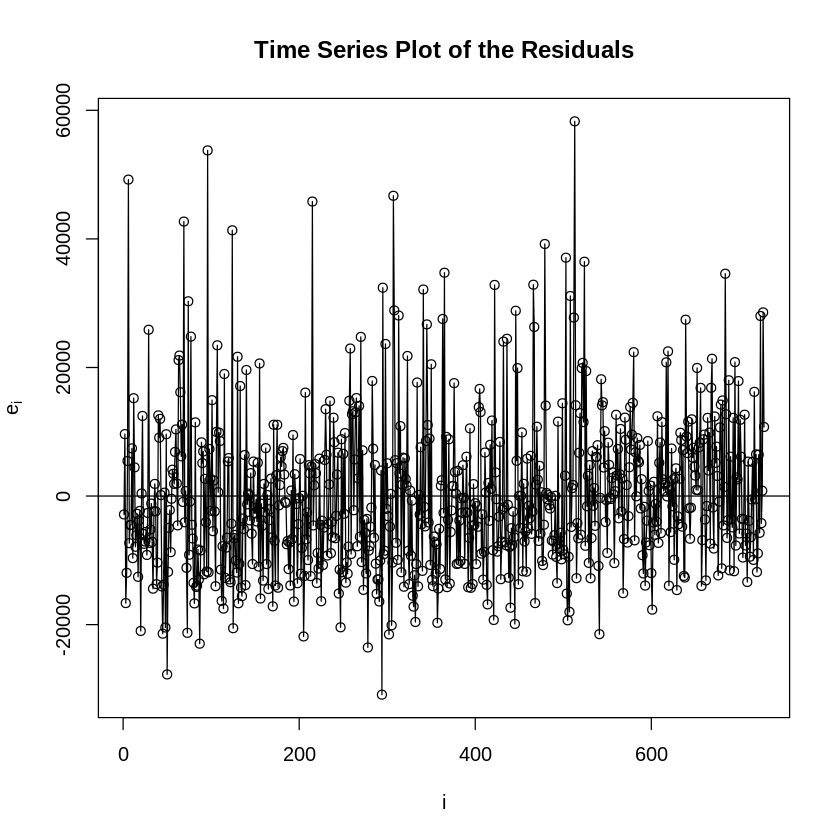

In [14]:
plot(re, main="Time Series Plot of the Residuals", xlab=TeX("i"), ylab=TeX("e_i"))
lines(re)
abline(h=0)

Significance test:


	Runs Test - Two sided

data:  re
Standardized Runs Statistic = -0.51923, p-value = 0.6036


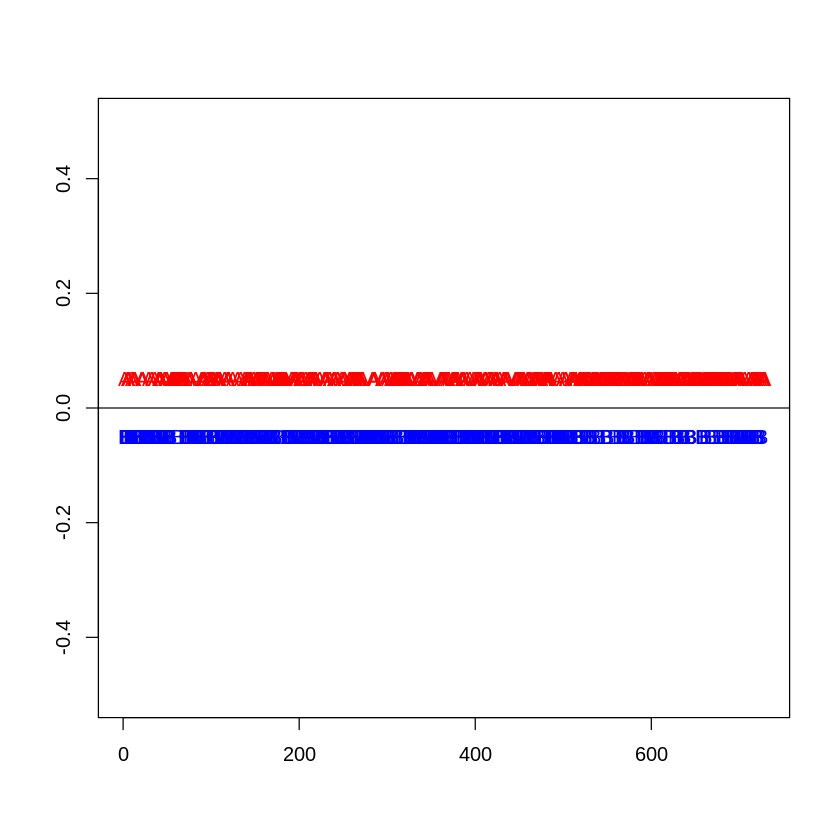

In [15]:
runs.test(re, plot.it=TRUE)

Finally, the independance assumption seem to be the only one clearly supported. Both plot and test conclude that hypothesis of independant residuals is failed to be rejected.

As, some of the assumptions were violated, it can be summarized that variables are not proper for SLR as they are. However, some remedial measures can be done.

## Remedial Procedures

Usually, situation can be improved by applying transformation to the x or/and y variables. One possible option to rehabilitate non-normality of errors is using BoxCox transformation. 

### Transformation of x

Transformation to predictor variable - x.

In [16]:
bc = powerTransform(data$Tuition)
summary(bc)

bcPower Transformation to Normality 
             Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
data$Tuition    0.5147         0.5       0.3684        0.661

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                          LRT df       pval
LR test, lambda = (0) 52.0571  1 5.3912e-13

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 38.97197  1 4.2993e-10

Estimated value for $\lambda$ is 0.5. Apply transformation $w^{(0.5)}$ to x

In [17]:
data$TuitionBC =('^'(data$Tuition, 0.5)-1)/0.5

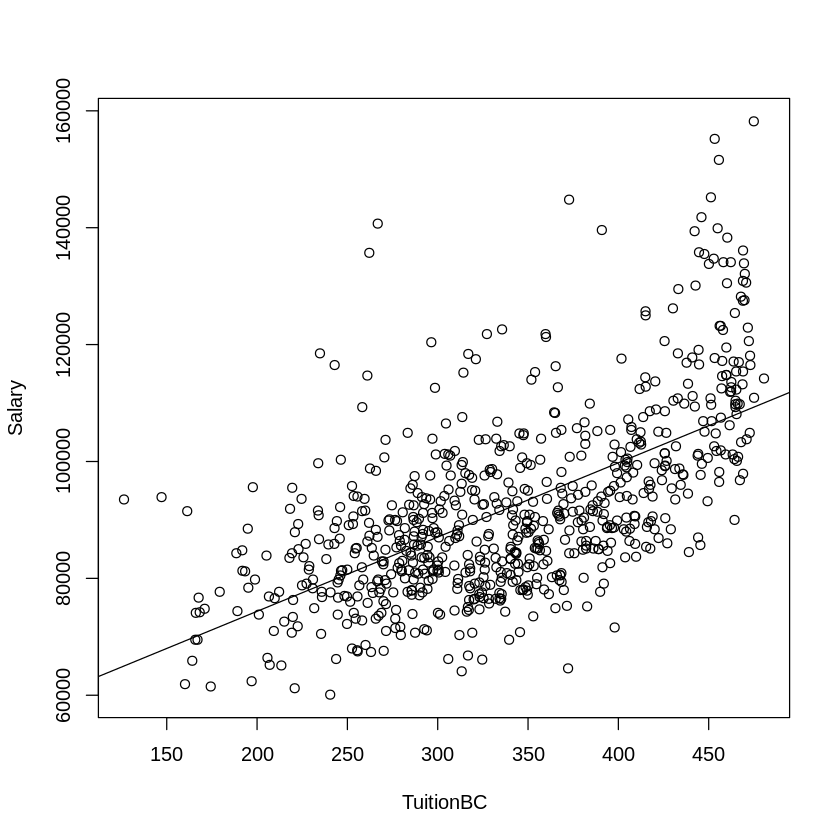

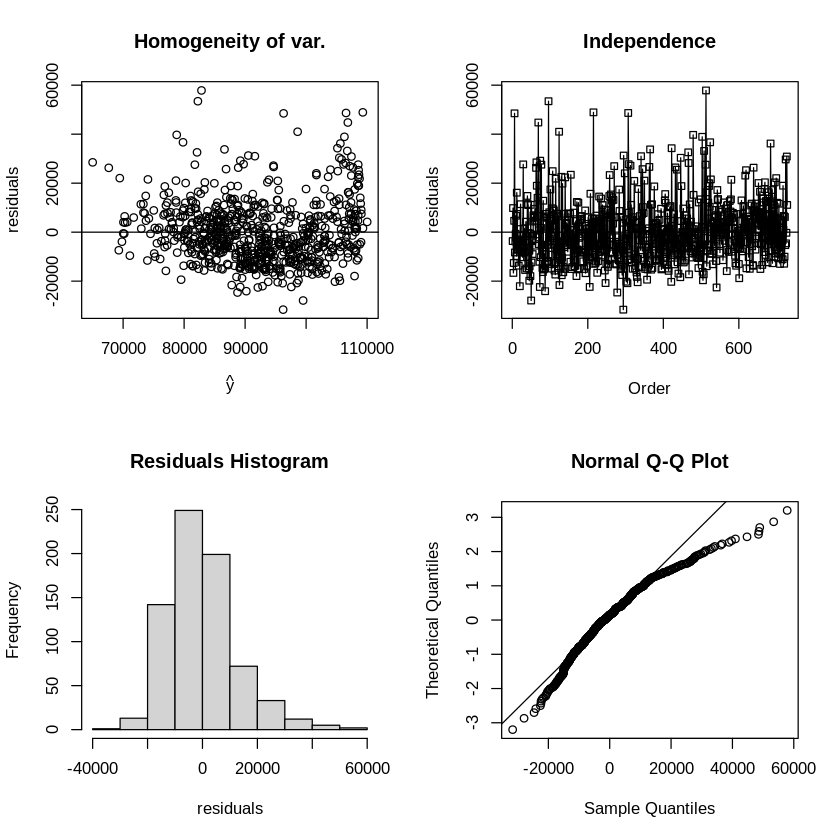

In [18]:
plot(Salary ~ TuitionBC, data=data) 


mod = lm(Salary ~ TuitionBC, data=data)
abline(mod)

reBC=mod$residuals

par(mfrow=c(2,2))

# Homogeneity of variance
plot(reBC~fitted.values(mod),xlab=expression(hat(y)),ylab="residuals",main="Homogeneity of var.")
abline(h=0)

# Independence
plot(reBC,type="o",pch=22,xlab="Order",ylab="residuals",main="Independence")
abline(h=0)

# Normality
hist(reBC,main="Residuals Histogram",xlab="residuals")
qqnorm(reBC,datax=TRUE)
qqline(reBC,datax=TRUE)

In [19]:
shapiro.test(reBC)


	Shapiro-Wilk normality test

data:  reBC
W = 0.94594, p-value = 1.199e-15


Situation did not seem to be improved a lot. Try transformation of response variable.

### Transformation of y

In [20]:
bc = powerTransform(data$Salary)
summary(bc)

bcPower Transformation to Normality 
            Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
data$Salary   -1.0547          -1      -1.4217      -0.6876

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df       pval
LR test, lambda = (0) 32.28079  1 1.3343e-08

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 124.3374  1 < 2.22e-16

Estimated value of $\lambda$ is -1. Apply $w^{(-1)}$ to y.


In [21]:
data$SalaryBC =('^'(data$Salary, -1)-1)/-1

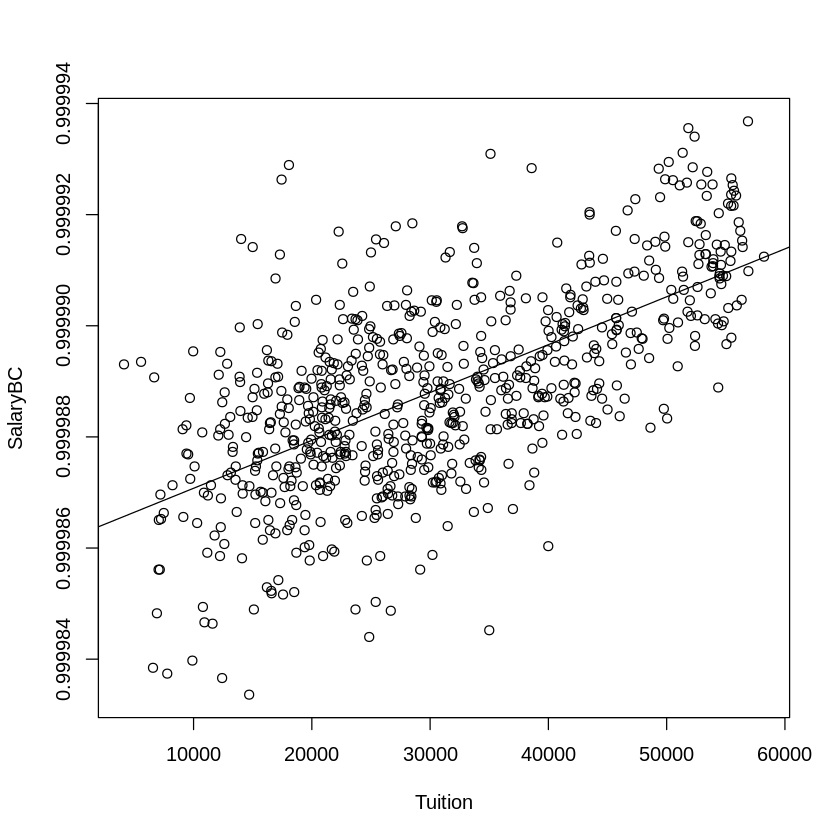

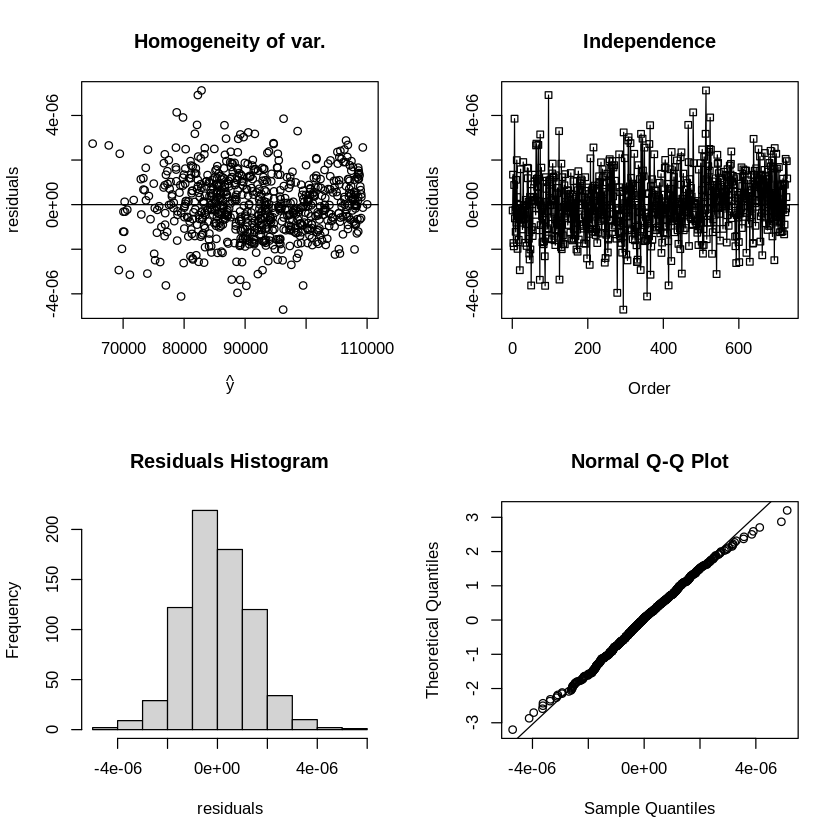

In [22]:
plot(SalaryBC ~ Tuition, data=data) 

mod2 = lm(SalaryBC ~ Tuition, data=data)
abline(mod2)

reBC2=mod2$residuals

par(mfrow=c(2,2))

# Homogeneity of variance
plot(reBC2~fitted.values(mod),xlab=expression(hat(y)),ylab="residuals",main="Homogeneity of var.")
abline(h=0)

# Independence
plot(reBC2,type="o",pch=22,xlab="Order",ylab="residuals",main="Independence")
abline(h=0)

# Normality
hist(reBC2,main="Residuals Histogram",xlab="residuals")
qqnorm(reBC2,datax=TRUE)
qqline(reBC2,datax=TRUE)

In [23]:
shapiro.test(reBC2)


	Shapiro-Wilk normality test

data:  reBC2
W = 0.99593, p-value = 0.0549


Better picture! Now, normality test concludes to FTR the null hypothesis of normal distribution.

### Transformation of x&y

Try transforming both x and y with estimated lambda parameters.

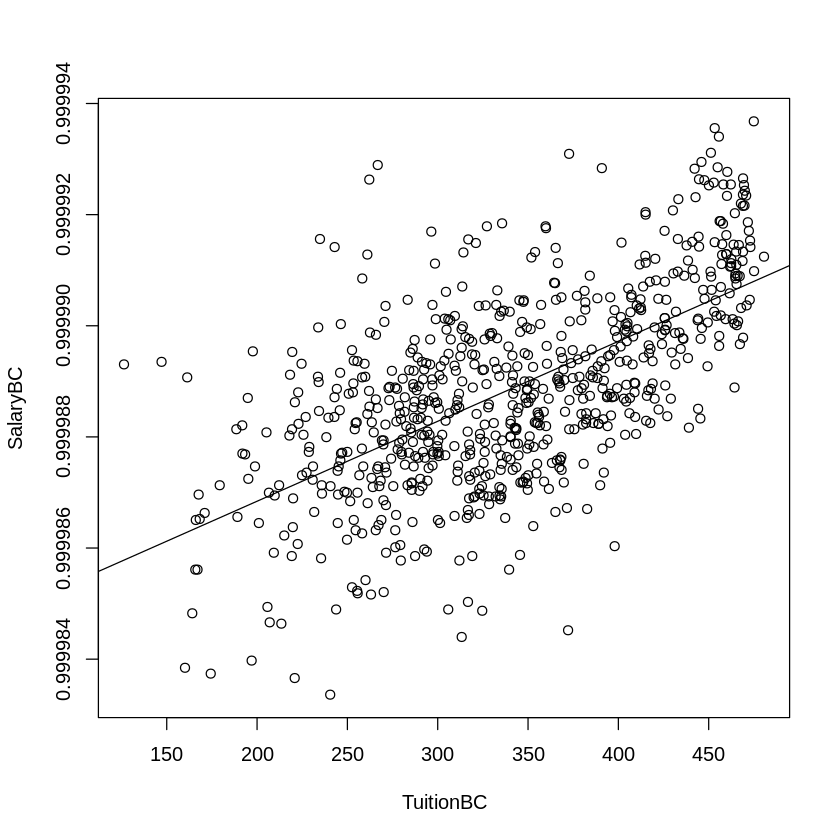

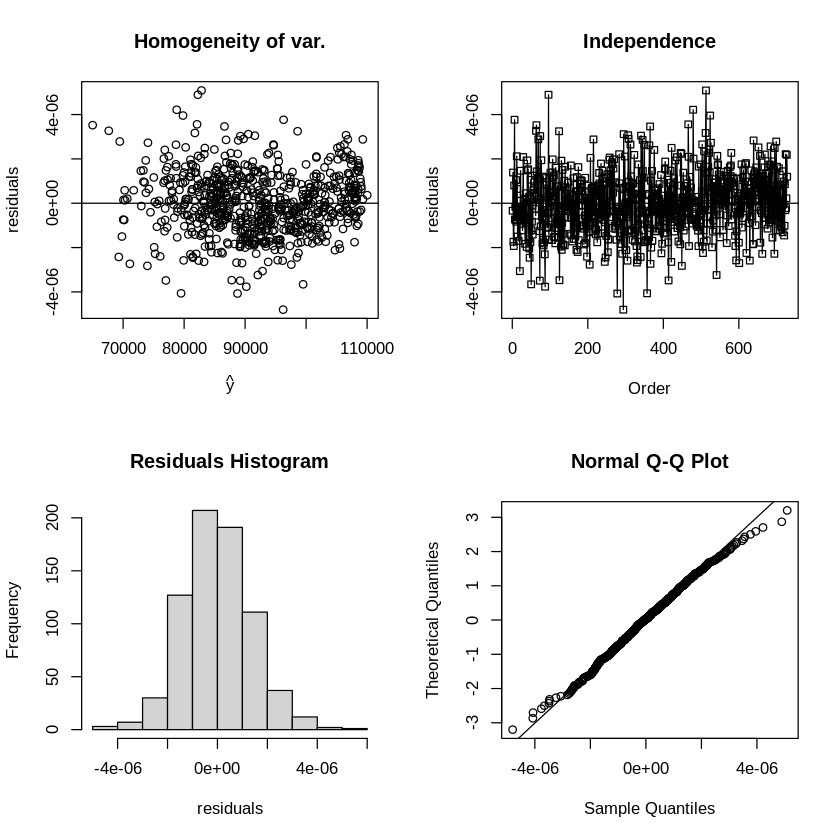

In [24]:
plot(SalaryBC ~ TuitionBC, data=data) 


mod3 = lm(SalaryBC ~ TuitionBC, data=data)
abline(mod3)

reBC3=mod3$residuals

par(mfrow=c(2,2))

# Homogeneity of variance
plot(reBC3~fitted.values(mod),xlab=expression(hat(y)),ylab="residuals",main="Homogeneity of var.")
abline(h=0)

# Independence
plot(reBC3,type="o",pch=22,xlab="Order",ylab="residuals",main="Independence")
abline(h=0)

# Normality
hist(reBC3,main="Residuals Histogram",xlab="residuals")
qqnorm(reBC3,datax=TRUE)
qqline(reBC3,datax=TRUE)

In [25]:
shapiro.test(reBC3)


	Shapiro-Wilk normality test

data:  reBC3
W = 0.99644, p-value = 0.1018


Even better!

At this point Normality of the residuals can be concluded (or at least fails to concluded otherwise) almost at any s.l!

### Results of Transformation

Another violated assumptions were homogenuity of the variances and linearity.

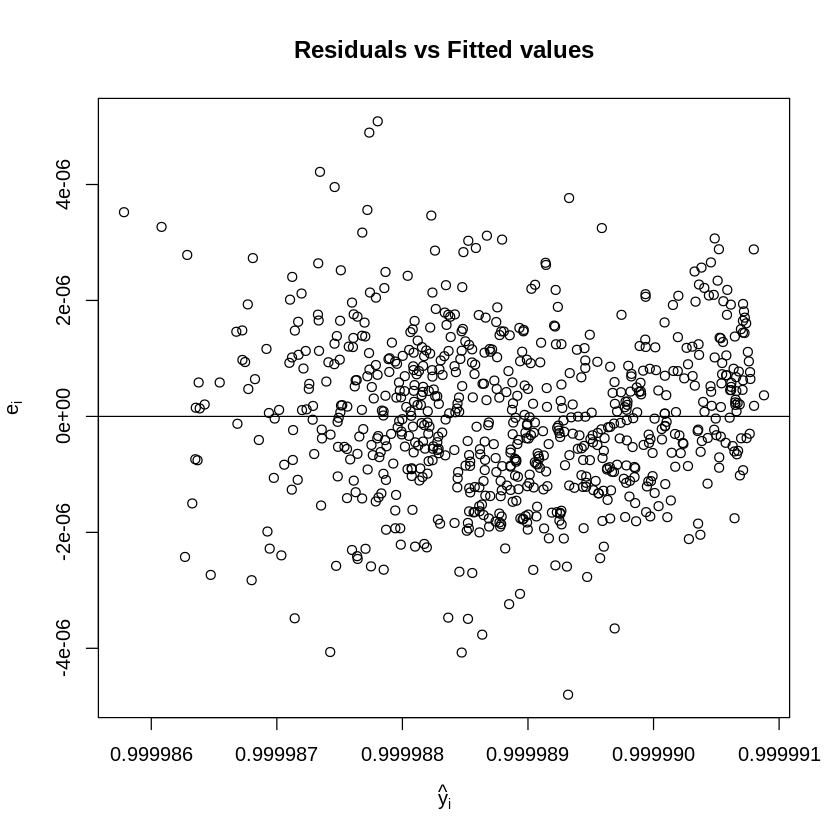

In [26]:
par(mfrow=c(1,1))
fitsBC = mod3$fitted.values

plot(reBC3 ~ fitsBC, main="Residuals vs Fitted values", xlab=TeX("\\hat{y}_i"), ylab=TeX("e_i"))
abline(h=0)

In [27]:
breaks = c(0, 310, 360, 481)
groups = cut(data$TuitionBC, breaks)
leveneTest(reBC3, groups)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.265701,0.1044915
,725,NA,NA


Here situation has also improved! Levene Test also can be concluded to FTR the null hypothesis. However, Levene Test is very sensitive to choice of intervals, and p-value drops for other combinations of groups. 

So, even though it is better than before transformation, it is not consistent enought yet.

Same for linearity, we can observe that now number of points below and above zero line is more or less the same, it is still far from safely being linear. 

# Conclusion

The analysis whether chosen x and y variables can be properly fit and described by Simple Linear Regression has been made. For this, diagnostics of predictor variable and SLR assumptions have been checked. 

Although, predictor variable does not have any inconsistencies, there were several (3/4) violations of the assumptions, namely Normality of Errors, Linearity and Homogeneity. I also understood how important is to use significance tests, because graph themselves are not conclusive enough abd may even be misleading.

Tests used for this project are Shapiro, Levene and Runs tests. As these tests revealed violations, some remedial measures, namely BoxCox transformation, was used. 

It appeared that transforming both x and y shows better results on all tests, but still not perfect. 

And the drawback is that transformed variables themselves are not interpretable anymore. Therefore, I conclude that particularly this data is not suited for SLR and better to try to use nonlinear fits. 

Further improvements:
As I mentioned, other models besides Linear regression possibly would do a better job. Another remedial measures can be tried. Moreover, to impove project further other variables should be added.

